In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import cartopy.crs as ccrs
 
# additional configuration (optional)
%config InlineBackend.figure_format = 'retina'

from dask.distributed import Client #client is the interface to
from dask.distributed import LocalCluster #Start the cluster locally
cluster = LocalCluster()
client = Client(cluster) #Connect the client to the c
client

Client Scheduler: tcp://127.0.0.1:41083 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 33.22 GB


In [2]:
#### Load all model output needed ####
ds_static_esm4 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_monthly.static.nc')

## Control data
ds_potorho_esm4_piControl = xr.open_dataset('/net/Rebecca.Beadling/southern_ocean_fafmip/Figures/Ensemble-Means/CM4/1000m_isobath_transports/esm4_potential_density_ref_to_surf_100yr_ave_121_220.nc').sel(yh=slice(-90,-30))
ds_so_esm4_piControl = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_annual_z.0101-0270.so.nc',
                                           chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))

## Antwater data salinity
ds_so_esm4_antwater_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_101/ocean_annual_z.0151-0170.so.nc',
                                        chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))
ds_so_esm4_antwater_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_151/ocean_annual_z.0051-0070.so.nc',
                                        chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))
ds_so_esm4_antwater_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_201/ocean_annual_z.0051-0070.so.nc',
                                        chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))

## Antwaterstress data salinity
ds_so_esm4_antwaterstress_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_101/ocean_annual_z.0151-0170.so.nc',
                                        chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))
ds_so_esm4_antwaterstress_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_151/ocean_annual_z.0051-0070.so.nc',
                                        chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))
ds_so_esm4_antwaterstress_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_201/ocean_annual_z.0051-0070.so.nc',
                                        chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))

# Stress data salinity
ds_so_esm4_stress_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_101/ocean_annual_z.0151-0170.so.nc',
                                        chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))
ds_so_esm4_stress_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_151/ocean_annual_z.0051-0070.so.nc',
                                        chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))
ds_so_esm4_stress_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_201/ocean_annual_z.0051-0070.so.nc',
                                        chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))

## Load potential density referenced output that was saved:

potorho_esm4 = xr.open_dataset('/net/Rebecca.Beadling/southern_ocean_fafmip/Figures/Ensemble-Means/CM4/1000m_isobath_transports/esm4_potential_density_ref_to_surf_all_experiments_years51to70ave.nc')


In [3]:
potential_density_antwater_101_esm4_ave = potorho_esm4.poto_rho_ref_surface_esm4_antwater_101 - 1000
potential_density_antwater_151_esm4_ave = potorho_esm4.poto_rho_ref_surface_esm4_antwater_151 - 1000
potential_density_antwater_201_esm4_ave = potorho_esm4.poto_rho_ref_surface_esm4_antwater_201 - 1000

potential_density_antwaterstress_101_esm4_ave = potorho_esm4.poto_rho_ref_surface_esm4_antwaterstress_101 - 1000
potential_density_antwaterstress_151_esm4_ave = potorho_esm4.poto_rho_ref_surface_esm4_antwaterstress_151 - 1000
potential_density_antwaterstress_201_esm4_ave = potorho_esm4.poto_rho_ref_surface_esm4_antwaterstress_201 - 1000

potential_density_stress_101_esm4_ave = potorho_esm4.poto_rho_ref_surface_esm4_stress_101 - 1000
potential_density_stress_151_esm4_ave = potorho_esm4.poto_rho_ref_surface_esm4_stress_151 - 1000
potential_density_stress_201_esm4_ave = potorho_esm4.poto_rho_ref_surface_esm4_stress_201 - 1000

potential_density_antwater_101_esm4_ave

<xarray.DataArray 'poto_rho_ref_surface_esm4_antwater_101' (z_l: 35, yh: 576, xh: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03

In [4]:
## 20E -- Temperature
# Antwater
asc_region_antwater_101_esm4_20e_so = ds_so_esm4_antwater_101.so.sel(yh=slice(-70.5,-68),time=slice('0151-07-02','0170-07-02')).sel(xh=20,method='nearest').mean(dim='time')
asc_region_antwater_151_esm4_20e_so = ds_so_esm4_antwater_151.so.sel(yh=slice(-70.5,-68),time=slice('0051-07-02','0070-07-02')).sel(xh=20,method='nearest').mean(dim='time')
asc_region_antwater_201_esm4_20e_so = ds_so_esm4_antwater_201.so.sel(yh=slice(-70.5,-68),time=slice('0051-07-02','0070-07-02')).sel(xh=20,method='nearest').mean(dim='time')

asc_region_antwater_esm4_20e_so_ens = xr.concat([asc_region_antwater_101_esm4_20e_so,asc_region_antwater_151_esm4_20e_so,asc_region_antwater_201_esm4_20e_so],dim='member')
asc_region_antwater_esm4_20e_so_ens_mean = asc_region_antwater_esm4_20e_so_ens.mean(dim='member')

# Antwaterstress
asc_region_antwaterstress_101_esm4_20e_so = ds_so_esm4_antwaterstress_101.so.sel(yh=slice(-70.5,-68),time=slice('0151-07-02','0170-07-02')).sel(xh=20,method='nearest').mean(dim='time')
asc_region_antwaterstress_151_esm4_20e_so = ds_so_esm4_antwaterstress_151.so.sel(yh=slice(-70.5,-68),time=slice('0051-07-02','0070-07-02')).sel(xh=20,method='nearest').mean(dim='time')
asc_region_antwaterstress_201_esm4_20e_so = ds_so_esm4_antwaterstress_201.so.sel(yh=slice(-70.5,-68),time=slice('0051-07-02','0070-07-02')).sel(xh=20,method='nearest').mean(dim='time')

asc_region_antwaterstress_esm4_20e_so_ens = xr.concat([asc_region_antwaterstress_101_esm4_20e_so,asc_region_antwaterstress_151_esm4_20e_so,asc_region_antwaterstress_201_esm4_20e_so],dim='member')
asc_region_antwaterstress_esm4_20e_so_ens_mean = asc_region_antwaterstress_esm4_20e_so_ens.mean(dim='member')

#Stress
asc_region_stress_101_esm4_20e_so = ds_so_esm4_stress_101.so.sel(yh=slice(-70.5,-68),time=slice('0151-07-02','0170-07-02')).sel(xh=20,method='nearest').mean(dim='time')
asc_region_stress_151_esm4_20e_so = ds_so_esm4_stress_151.so.sel(yh=slice(-70.5,-68),time=slice('0051-07-02','0070-07-02')).sel(xh=20,method='nearest').mean(dim='time')
asc_region_stress_201_esm4_20e_so = ds_so_esm4_stress_201.so.sel(yh=slice(-70.5,-68),time=slice('0051-07-02','0070-07-02')).sel(xh=20,method='nearest').mean(dim='time')

asc_region_stress_esm4_20e_so_ens = xr.concat([asc_region_stress_101_esm4_20e_so,asc_region_stress_151_esm4_20e_so,asc_region_stress_201_esm4_20e_so],dim='member')
asc_region_stress_esm4_20e_so_ens_mean = asc_region_stress_esm4_20e_so_ens.mean(dim='member')

In [5]:
## 150e -- Temperature
# Antwater
asc_region_antwater_101_esm4_150e_so = ds_so_esm4_antwater_101.so.sel(yh=slice(-69,-65.2),time=slice('0151-07-02','0170-07-02')).sel(xh=-210,method='nearest').mean(dim='time')
asc_region_antwater_151_esm4_150e_so = ds_so_esm4_antwater_151.so.sel(yh=slice(-69,-65.2),time=slice('0051-07-02','0070-07-02')).sel(xh=-210,method='nearest').mean(dim='time')
asc_region_antwater_201_esm4_150e_so = ds_so_esm4_antwater_201.so.sel(yh=slice(-69,-65.2),time=slice('0051-07-02','0070-07-02')).sel(xh=-210,method='nearest').mean(dim='time')

asc_region_antwater_esm4_150e_so_ens = xr.concat([asc_region_antwater_101_esm4_150e_so,asc_region_antwater_151_esm4_150e_so,asc_region_antwater_201_esm4_150e_so],dim='member')
asc_region_antwater_esm4_150e_so_ens_mean = asc_region_antwater_esm4_150e_so_ens.mean(dim='member')

# Antwaterstress
asc_region_antwaterstress_101_esm4_150e_so = ds_so_esm4_antwaterstress_101.so.sel(yh=slice(-69,-65.2),time=slice('0151-07-02','0170-07-02')).sel(xh=-210,method='nearest').mean(dim='time')
asc_region_antwaterstress_151_esm4_150e_so = ds_so_esm4_antwaterstress_151.so.sel(yh=slice(-69,-65.2),time=slice('0051-07-02','0070-07-02')).sel(xh=-210,method='nearest').mean(dim='time')
asc_region_antwaterstress_201_esm4_150e_so = ds_so_esm4_antwaterstress_201.so.sel(yh=slice(-69,-65.2),time=slice('0051-07-02','0070-07-02')).sel(xh=-210,method='nearest').mean(dim='time')

asc_region_antwaterstress_esm4_150e_so_ens = xr.concat([asc_region_antwaterstress_101_esm4_150e_so,asc_region_antwaterstress_151_esm4_150e_so,asc_region_antwaterstress_201_esm4_150e_so],dim='member')
asc_region_antwaterstress_esm4_150e_so_ens_mean = asc_region_antwaterstress_esm4_150e_so_ens.mean(dim='member')

#Stress
asc_region_stress_101_esm4_150e_so = ds_so_esm4_stress_101.so.sel(yh=slice(-69,-65.2),time=slice('0151-07-02','0170-07-02')).sel(xh=-210,method='nearest').mean(dim='time')
asc_region_stress_151_esm4_150e_so = ds_so_esm4_stress_151.so.sel(yh=slice(-69,-65.2),time=slice('0051-07-02','0070-07-02')).sel(xh=-210,method='nearest').mean(dim='time')
asc_region_stress_201_esm4_150e_so = ds_so_esm4_stress_201.so.sel(yh=slice(-69,-65.2),time=slice('0051-07-02','0070-07-02')).sel(xh=-210,method='nearest').mean(dim='time')

asc_region_stress_esm4_150e_so_ens = xr.concat([asc_region_stress_101_esm4_150e_so,asc_region_stress_151_esm4_150e_so,asc_region_stress_201_esm4_150e_so],dim='member')
asc_region_stress_esm4_150e_so_ens_mean = asc_region_stress_esm4_150e_so_ens.mean(dim='member')

In [6]:
## 130w -- Temperature
# Antwater
asc_region_antwater_101_esm4_130w_so = ds_so_esm4_antwater_101.so.sel(yh=slice(-75,-72),time=slice('0151-07-02','0170-07-02')).sel(xh=-130,method='nearest').mean(dim='time')
asc_region_antwater_151_esm4_130w_so = ds_so_esm4_antwater_151.so.sel(yh=slice(-75,-72),time=slice('0051-07-02','0070-07-02')).sel(xh=-130,method='nearest').mean(dim='time')
asc_region_antwater_201_esm4_130w_so = ds_so_esm4_antwater_201.so.sel(yh=slice(-75,-72),time=slice('0051-07-02','0070-07-02')).sel(xh=-130,method='nearest').mean(dim='time')

asc_region_antwater_esm4_130w_so_ens = xr.concat([asc_region_antwater_101_esm4_130w_so,asc_region_antwater_151_esm4_130w_so,asc_region_antwater_201_esm4_130w_so],dim='member')
asc_region_antwater_esm4_130w_so_ens_mean = asc_region_antwater_esm4_130w_so_ens.mean(dim='member')

# Antwaterstress
asc_region_antwaterstress_101_esm4_130w_so = ds_so_esm4_antwaterstress_101.so.sel(yh=slice(-75,-72),time=slice('0151-07-02','0170-07-02')).sel(xh=-130,method='nearest').mean(dim='time')
asc_region_antwaterstress_151_esm4_130w_so = ds_so_esm4_antwaterstress_151.so.sel(yh=slice(-75,-72),time=slice('0051-07-02','0070-07-02')).sel(xh=-130,method='nearest').mean(dim='time')
asc_region_antwaterstress_201_esm4_130w_so = ds_so_esm4_antwaterstress_201.so.sel(yh=slice(-75,-72),time=slice('0051-07-02','0070-07-02')).sel(xh=-130,method='nearest').mean(dim='time')

asc_region_antwaterstress_esm4_130w_so_ens = xr.concat([asc_region_antwaterstress_101_esm4_130w_so,asc_region_antwaterstress_151_esm4_130w_so,asc_region_antwaterstress_201_esm4_130w_so],dim='member')
asc_region_antwaterstress_esm4_130w_so_ens_mean = asc_region_antwaterstress_esm4_130w_so_ens.mean(dim='member')

#Stress
asc_region_stress_101_esm4_130w_so = ds_so_esm4_stress_101.so.sel(yh=slice(-75,-72),time=slice('0151-07-02','0170-07-02')).sel(xh=-130,method='nearest').mean(dim='time')
asc_region_stress_151_esm4_130w_so = ds_so_esm4_stress_151.so.sel(yh=slice(-75,-72),time=slice('0051-07-02','0070-07-02')).sel(xh=-130,method='nearest').mean(dim='time')
asc_region_stress_201_esm4_130w_so = ds_so_esm4_stress_201.so.sel(yh=slice(-75,-72),time=slice('0051-07-02','0070-07-02')).sel(xh=-130,method='nearest').mean(dim='time')

asc_region_stress_esm4_130w_so_ens = xr.concat([asc_region_stress_101_esm4_130w_so,asc_region_stress_151_esm4_130w_so,asc_region_stress_201_esm4_130w_so],dim='member')
asc_region_stress_esm4_130w_so_ens_mean = asc_region_stress_esm4_130w_so_ens.mean(dim='member')

In [7]:
## 80w -- Temperature
# Antwater
asc_region_antwater_101_esm4_80w_so = ds_so_esm4_antwater_101.so.sel(yh=slice(-74,-68),time=slice('0151-07-02','0170-07-02')).sel(xh=-80,method='nearest').mean(dim='time')
asc_region_antwater_151_esm4_80w_so = ds_so_esm4_antwater_151.so.sel(yh=slice(-74,-68),time=slice('0051-07-02','0070-07-02')).sel(xh=-80,method='nearest').mean(dim='time')
asc_region_antwater_201_esm4_80w_so = ds_so_esm4_antwater_201.so.sel(yh=slice(-74,-68),time=slice('0051-07-02','0070-07-02')).sel(xh=-80,method='nearest').mean(dim='time')

asc_region_antwater_esm4_80w_so_ens = xr.concat([asc_region_antwater_101_esm4_80w_so,asc_region_antwater_151_esm4_80w_so,asc_region_antwater_201_esm4_80w_so],dim='member')
asc_region_antwater_esm4_80w_so_ens_mean = asc_region_antwater_esm4_80w_so_ens.mean(dim='member')

# Antwaterstress
asc_region_antwaterstress_101_esm4_80w_so = ds_so_esm4_antwaterstress_101.so.sel(yh=slice(-74,-68),time=slice('0151-07-02','0170-07-02')).sel(xh=-80,method='nearest').mean(dim='time')
asc_region_antwaterstress_151_esm4_80w_so = ds_so_esm4_antwaterstress_151.so.sel(yh=slice(-74,-68),time=slice('0051-07-02','0070-07-02')).sel(xh=-80,method='nearest').mean(dim='time')
asc_region_antwaterstress_201_esm4_80w_so = ds_so_esm4_antwaterstress_201.so.sel(yh=slice(-74,-68),time=slice('0051-07-02','0070-07-02')).sel(xh=-80,method='nearest').mean(dim='time')

asc_region_antwaterstress_esm4_80w_so_ens = xr.concat([asc_region_antwaterstress_101_esm4_80w_so,asc_region_antwaterstress_151_esm4_80w_so,asc_region_antwaterstress_201_esm4_80w_so],dim='member')
asc_region_antwaterstress_esm4_80w_so_ens_mean = asc_region_antwaterstress_esm4_80w_so_ens.mean(dim='member')

#Stress
asc_region_stress_101_esm4_80w_so = ds_so_esm4_stress_101.so.sel(yh=slice(-74,-68),time=slice('0151-07-02','0170-07-02')).sel(xh=-80,method='nearest').mean(dim='time')
asc_region_stress_151_esm4_80w_so = ds_so_esm4_stress_151.so.sel(yh=slice(-74,-68),time=slice('0051-07-02','0070-07-02')).sel(xh=-80,method='nearest').mean(dim='time')
asc_region_stress_201_esm4_80w_so = ds_so_esm4_stress_201.so.sel(yh=slice(-74,-68),time=slice('0051-07-02','0070-07-02')).sel(xh=-80,method='nearest').mean(dim='time')

asc_region_stress_esm4_80w_so_ens = xr.concat([asc_region_stress_101_esm4_80w_so,asc_region_stress_151_esm4_80w_so,asc_region_stress_201_esm4_80w_so],dim='member')
asc_region_stress_esm4_80w_so_ens_mean = asc_region_stress_esm4_80w_so_ens.mean(dim='member')

In [8]:
## Compute temperature and salinity 100 - yr average at cross sections for piControl
## Temperature
asc_region_piControl_esm4_20e_so = ds_so_esm4_piControl.so.sel(yh=slice(-70.5,-68),time=slice('0121-07-02','0220-07-02')).sel(xh=20,method='nearest').mean(dim='time')
asc_region_piControl_esm4_150e_so = ds_so_esm4_piControl.so.sel(yh=slice(-69,-65.2),time=slice('0121-07-02','0220-07-02')).sel(xh=-210,method='nearest').mean(dim='time')
asc_region_piControl_esm4_130w_so = ds_so_esm4_piControl.so.sel(yh=slice(-75,-72),time=slice('0121-07-02','0220-07-02')).sel(xh=-130,method='nearest').mean(dim='time')
asc_region_piControl_esm4_80w_so = ds_so_esm4_piControl.so.sel(yh=slice(-74,-68),time=slice('0121-07-02','0220-07-02')).sel(xh=-80,method='nearest').mean(dim='time')

In [9]:
## Compute ens mean differences:
asc_region_antwater_esm4_20e_so_ens_mean_diff = asc_region_antwater_esm4_20e_so_ens_mean - asc_region_piControl_esm4_20e_so
asc_region_antwater_esm4_150e_so_ens_mean_diff = asc_region_antwater_esm4_150e_so_ens_mean - asc_region_piControl_esm4_150e_so
asc_region_antwater_esm4_130w_so_ens_mean_diff = asc_region_antwater_esm4_130w_so_ens_mean - asc_region_piControl_esm4_130w_so
asc_region_antwater_esm4_80w_so_ens_mean_diff = asc_region_antwater_esm4_80w_so_ens_mean - asc_region_piControl_esm4_80w_so

In [10]:
##define asc regions - potential density

##antwater
asc_region_antwater_101_esm4_20e_so_potodens = potential_density_antwater_101_esm4_ave.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest') 
asc_region_antwater_101_esm4_150e_so_potodens = potential_density_antwater_101_esm4_ave.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_region_antwater_101_esm4_130w_so_potodens  = potential_density_antwater_101_esm4_ave.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_region_antwater_101_esm4_80w_so_potodens = potential_density_antwater_101_esm4_ave.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')

asc_region_antwater_151_esm4_20e_so_potodens = potential_density_antwater_151_esm4_ave.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
asc_region_antwater_151_esm4_150e_so_potodens = potential_density_antwater_151_esm4_ave.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_region_antwater_151_esm4_130w_so_potodens  = potential_density_antwater_151_esm4_ave.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_region_antwater_151_esm4_80w_so_potodens = potential_density_antwater_151_esm4_ave.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')

asc_region_antwater_201_esm4_20e_so_potodens = potential_density_antwater_201_esm4_ave.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
asc_region_antwater_201_esm4_150e_so_potodens = potential_density_antwater_201_esm4_ave.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_region_antwater_201_esm4_130w_so_potodens  = potential_density_antwater_201_esm4_ave.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_region_antwater_201_esm4_80w_so_potodens = potential_density_antwater_201_esm4_ave.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')

## Compute ensemble mean potential density for contours for each section:
## 20 e
asc_region_antwater_esm4_20e_so_potodens_ens = xr.concat([asc_region_antwater_101_esm4_20e_so_potodens,asc_region_antwater_151_esm4_20e_so_potodens,asc_region_antwater_201_esm4_20e_so_potodens],dim='member')
asc_region_antwater_esm4_20e_so_potodens_ens_mean = asc_region_antwater_esm4_20e_so_potodens_ens.mean(dim='member')

asc_region_antwater_esm4_150e_so_potodens_ens = xr.concat([asc_region_antwater_101_esm4_150e_so_potodens,asc_region_antwater_151_esm4_150e_so_potodens,asc_region_antwater_201_esm4_150e_so_potodens],dim='member')
asc_region_antwater_esm4_150e_so_potodens_ens_mean = asc_region_antwater_esm4_150e_so_potodens_ens.mean(dim='member')

asc_region_antwater_esm4_130w_so_potodens_ens = xr.concat([asc_region_antwater_101_esm4_130w_so_potodens,asc_region_antwater_151_esm4_130w_so_potodens,asc_region_antwater_201_esm4_130w_so_potodens],dim='member')
asc_region_antwater_esm4_130w_so_potodens_ens_mean = asc_region_antwater_esm4_130w_so_potodens_ens.mean(dim='member')

asc_region_antwater_esm4_80w_so_potodens_ens = xr.concat([asc_region_antwater_101_esm4_80w_so_potodens,asc_region_antwater_151_esm4_80w_so_potodens,asc_region_antwater_201_esm4_80w_so_potodens],dim='member')
asc_region_antwater_esm4_80w_so_potodens_ens_mean = asc_region_antwater_esm4_80w_so_potodens_ens.mean(dim='member')

##antwaterstress

asc_region_antwaterstress_101_esm4_20e_so_potodens = potential_density_antwaterstress_101_esm4_ave.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest') 
asc_region_antwaterstress_101_esm4_150e_so_potodens = potential_density_antwaterstress_101_esm4_ave.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_region_antwaterstress_101_esm4_130w_so_potodens  = potential_density_antwaterstress_101_esm4_ave.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest') 
asc_region_antwaterstress_101_esm4_80w_so_potodens = potential_density_antwaterstress_101_esm4_ave.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')

asc_region_antwaterstress_151_esm4_20e_so_potodens = potential_density_antwaterstress_151_esm4_ave.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
asc_region_antwaterstress_151_esm4_150e_so_potodens = potential_density_antwaterstress_151_esm4_ave.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_region_antwaterstress_151_esm4_130w_so_potodens  = potential_density_antwaterstress_151_esm4_ave.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_region_antwaterstress_151_esm4_80w_so_potodens = potential_density_antwaterstress_151_esm4_ave.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')

asc_region_antwaterstress_201_esm4_20e_so_potodens = potential_density_antwaterstress_201_esm4_ave.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
asc_region_antwaterstress_201_esm4_150e_so_potodens = potential_density_antwaterstress_201_esm4_ave.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest') 
asc_region_antwaterstress_201_esm4_130w_so_potodens  = potential_density_antwaterstress_201_esm4_ave.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest') 
asc_region_antwaterstress_201_esm4_80w_so_potodens = potential_density_antwaterstress_201_esm4_ave.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest') 


asc_region_antwaterstress_esm4_20e_so_potodens_ens = xr.concat([asc_region_antwaterstress_101_esm4_20e_so_potodens,asc_region_antwaterstress_151_esm4_20e_so_potodens,asc_region_antwaterstress_201_esm4_20e_so_potodens],dim='member')
asc_region_antwaterstress_esm4_20e_so_potodens_ens_mean = asc_region_antwaterstress_esm4_20e_so_potodens_ens.mean(dim='member')

asc_region_antwaterstress_esm4_150e_so_potodens_ens = xr.concat([asc_region_antwaterstress_101_esm4_150e_so_potodens,asc_region_antwaterstress_151_esm4_150e_so_potodens,asc_region_antwaterstress_201_esm4_150e_so_potodens],dim='member')
asc_region_antwaterstress_esm4_150e_so_potodens_ens_mean = asc_region_antwaterstress_esm4_150e_so_potodens_ens.mean(dim='member')

asc_region_antwaterstress_esm4_130w_so_potodens_ens = xr.concat([asc_region_antwaterstress_101_esm4_130w_so_potodens,asc_region_antwaterstress_151_esm4_130w_so_potodens,asc_region_antwaterstress_201_esm4_130w_so_potodens],dim='member')
asc_region_antwaterstress_esm4_130w_so_potodens_ens_mean = asc_region_antwaterstress_esm4_130w_so_potodens_ens.mean(dim='member')

asc_region_antwaterstress_esm4_80w_so_potodens_ens = xr.concat([asc_region_antwaterstress_101_esm4_80w_so_potodens,asc_region_antwaterstress_151_esm4_80w_so_potodens,asc_region_antwaterstress_201_esm4_80w_so_potodens],dim='member')
asc_region_antwaterstress_esm4_80w_so_potodens_ens_mean = asc_region_antwaterstress_esm4_80w_so_potodens_ens.mean(dim='member')

##stress

asc_region_stress_101_esm4_20e_so_potodens = potential_density_stress_101_esm4_ave.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
asc_region_stress_101_esm4_150e_so_potodens = potential_density_stress_101_esm4_ave.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest') 
asc_region_stress_101_esm4_130w_so_potodens  = potential_density_stress_101_esm4_ave.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_region_stress_101_esm4_80w_so_potodens = potential_density_stress_101_esm4_ave.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')

asc_region_stress_151_esm4_20e_so_potodens = potential_density_stress_151_esm4_ave.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest') 
asc_region_stress_151_esm4_150e_so_potodens = potential_density_stress_151_esm4_ave.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest') 
asc_region_stress_151_esm4_130w_so_potodens  = potential_density_stress_151_esm4_ave.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest') 
asc_region_stress_151_esm4_80w_so_potodens = potential_density_stress_151_esm4_ave.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')

asc_region_stress_201_esm4_20e_so_potodens = potential_density_stress_201_esm4_ave.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest') 
asc_region_stress_201_esm4_150e_so_potodens = potential_density_stress_201_esm4_ave.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_region_stress_201_esm4_130w_so_potodens  = potential_density_stress_201_esm4_ave.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_region_stress_201_esm4_80w_so_potodens = potential_density_stress_201_esm4_ave.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest') 


asc_region_stress_esm4_20e_so_potodens_ens = xr.concat([asc_region_stress_101_esm4_20e_so_potodens,asc_region_stress_151_esm4_20e_so_potodens,asc_region_stress_201_esm4_20e_so_potodens],dim='member')
asc_region_stress_esm4_20e_so_potodens_ens_mean = asc_region_stress_esm4_20e_so_potodens_ens.mean(dim='member')

asc_region_stress_esm4_150e_so_potodens_ens = xr.concat([asc_region_stress_101_esm4_150e_so_potodens,asc_region_stress_151_esm4_150e_so_potodens,asc_region_stress_201_esm4_150e_so_potodens],dim='member')
asc_region_stress_esm4_150e_so_potodens_ens_mean = asc_region_stress_esm4_150e_so_potodens_ens.mean(dim='member')

asc_region_stress_esm4_130w_so_potodens_ens = xr.concat([asc_region_stress_101_esm4_130w_so_potodens,asc_region_stress_151_esm4_130w_so_potodens,asc_region_stress_201_esm4_130w_so_potodens],dim='member')
asc_region_stress_esm4_130w_so_potodens_ens_mean = asc_region_stress_esm4_130w_so_potodens_ens.mean(dim='member')

asc_region_stress_esm4_80w_so_potodens_ens = xr.concat([asc_region_stress_101_esm4_80w_so_potodens,asc_region_stress_151_esm4_80w_so_potodens,asc_region_stress_201_esm4_80w_so_potodens],dim='member')
asc_region_stress_esm4_80w_so_potodens_ens_mean = asc_region_stress_esm4_80w_so_potodens_ens.mean(dim='member')



/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [11]:
### Compute mmm differences:
asc_region_antwater_esm4_20e_so_ens_mean_diff = asc_region_antwater_esm4_20e_so_ens_mean - asc_region_piControl_esm4_20e_so
asc_region_antwater_esm4_150e_so_ens_mean_diff = asc_region_antwater_esm4_150e_so_ens_mean - asc_region_piControl_esm4_150e_so
asc_region_antwater_esm4_130w_so_ens_mean_diff = asc_region_antwater_esm4_130w_so_ens_mean - asc_region_piControl_esm4_130w_so
asc_region_antwater_esm4_80w_so_ens_mean_diff = asc_region_antwater_esm4_80w_so_ens_mean - asc_region_piControl_esm4_80w_so

asc_region_antwaterstress_esm4_20e_so_ens_mean_diff = asc_region_antwaterstress_esm4_20e_so_ens_mean - asc_region_piControl_esm4_20e_so
asc_region_antwaterstress_esm4_150e_so_ens_mean_diff = asc_region_antwaterstress_esm4_150e_so_ens_mean - asc_region_piControl_esm4_150e_so
asc_region_antwaterstress_esm4_130w_so_ens_mean_diff = asc_region_antwaterstress_esm4_130w_so_ens_mean - asc_region_piControl_esm4_130w_so
asc_region_antwaterstress_esm4_80w_so_ens_mean_diff = asc_region_antwaterstress_esm4_80w_so_ens_mean - asc_region_piControl_esm4_80w_so

asc_region_stress_esm4_20e_so_ens_mean_diff = asc_region_stress_esm4_20e_so_ens_mean - asc_region_piControl_esm4_20e_so
asc_region_stress_esm4_150e_so_ens_mean_diff = asc_region_stress_esm4_150e_so_ens_mean - asc_region_piControl_esm4_150e_so
asc_region_stress_esm4_130w_so_ens_mean_diff = asc_region_stress_esm4_130w_so_ens_mean - asc_region_piControl_esm4_130w_so
asc_region_stress_esm4_80w_so_ens_mean_diff = asc_region_stress_esm4_80w_so_ens_mean - asc_region_piControl_esm4_80w_so

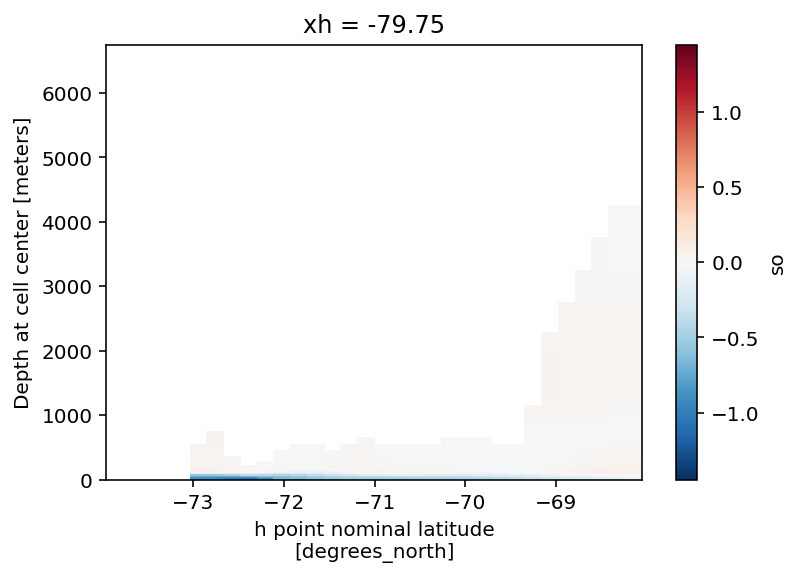

In [13]:
asc_region_antwater_esm4_80w_so_ens_mean_diff.plot()

In [14]:
## Get true bathymetry:
## Get information for shading true bathymetry:
ds_static_esm4 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_monthly.static.nc')

## Can use the same for the other members since bottom cell size does not change:
ds_volcello_fafantwaterstress_101 = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwaterstress/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ts/annual/5yr/*volcello.nc',combine='by_coords').sel(time=slice('0151-07-02','0170-07-02')).sel(yh=slice(-80,-30)).mean(dim='time')
ds_volcello_fafantwaterstress_151 = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwaterstress_151/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ts/annual/5yr/*volcello.nc',combine='by_coords').sel(time=slice('0051-07-02','0070-07-02')).sel(yh=slice(-80,-30)).mean(dim='time')
ds_volcello_fafantwaterstress_201 = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwaterstress_201/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ts/annual/5yr/*volcello.nc',combine='by_coords').sel(time=slice('0051-07-02','0070-07-02')).sel(yh=slice(-80,-30)).mean(dim='time')

### Compute ensemble mean years 51 to 70 volcello fields:
fafantwaterstress_ensemble_volcello = xr.concat([ds_volcello_fafantwaterstress_101,ds_volcello_fafantwaterstress_151,ds_volcello_fafantwaterstress_201],dim='member')
fafantwaterstress_ensemble_mean_volcello = fafantwaterstress_ensemble_volcello.volcello.mean(dim='member')


/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype 

In [15]:
## Compute the partial cell thickness at each cross section:
area_20e = ds_static_esm4.areacello.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values
area_150e = ds_static_esm4.areacello.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values
area_130w = ds_static_esm4.areacello.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values
area_80w = ds_static_esm4.areacello.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values

volume_20e = fafantwaterstress_ensemble_mean_volcello.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values
volume_150e = fafantwaterstress_ensemble_mean_volcello.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values
volume_130w = fafantwaterstress_ensemble_mean_volcello.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values
volume_80w = fafantwaterstress_ensemble_mean_volcello.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values

thickness_20e_antwaterstress = volume_20e/area_20e
thickness_150e_antwaterstress = volume_150e/area_150e
thickness_130w_antwaterstress = volume_130w/area_130w
thickness_80w_antwaterstress = volume_80w/area_80w

<ipython-input-16-46951a7ddcb0>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(lat_80w,z_l,thickness_80w_antwaterstress)


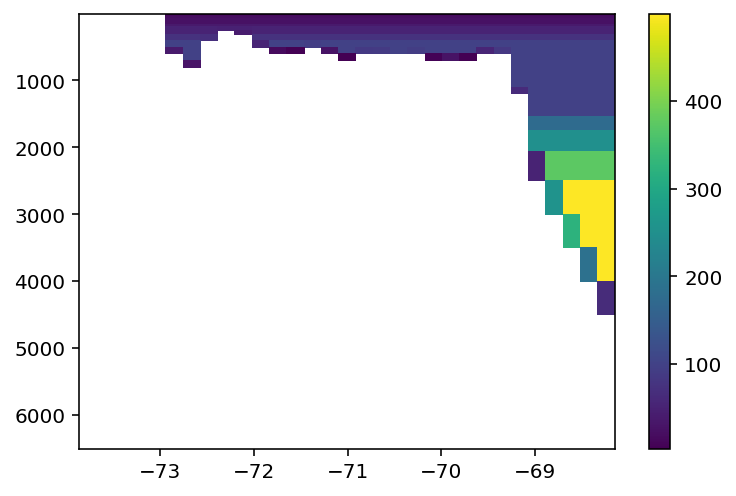

In [16]:
z_l = ds_so_esm4_antwaterstress_101['z_l'].values    
z_i = ds_so_esm4_antwaterstress_101['z_i'].values    
lat_20e = ds_so_esm4_antwaterstress_101['yh'].sel(yh=slice(-70.5,-68)).values  
lat_150e = ds_so_esm4_antwaterstress_101['yh'].sel(yh=slice(-69,-65.2)).values 
lat_130w = ds_so_esm4_antwaterstress_101['yh'].sel(yh=slice(-75,-72)).values 
lat_80w = ds_so_esm4_antwaterstress_101['yh'].sel(yh=slice(-74,-68)).values 

im = plt.pcolormesh(lat_80w,z_l,thickness_80w_antwaterstress)
plt.gca().invert_yaxis()
plt.colorbar(im)

In [17]:
## get depth to center of partial cell:

### 20e
kmax = thickness_20e_antwaterstress.shape[0]  ##Maximum k value, == 35
zl_20e_antwaterstress  = 0.0 * thickness_20e_antwaterstress[:]   ## Take all the values for thickness at 20e and multiply by zero. 
                                                                     ## so values are now zero where there was a value and NaN elsewhere
zl_20e_antwaterstress[0] = 0.5 * thickness_20e_antwaterstress[0] ## Multiple first element by 0.5.

k_20e = 1
while k_20e < kmax:
    zl_20e_antwaterstress[k_20e] = zl_20e_antwaterstress[k_20e-1] + 0.5 * (thickness_20e_antwaterstress[k_20e]+thickness_20e_antwaterstress[k_20e-1])
    k_20e=k_20e+1
    
zl_20e_antwaterstress_nm = np.array(zl_20e_antwaterstress)


### 150e
zl_150e_antwaterstress  = 0.0 * thickness_150e_antwaterstress[:]   ## Take all the values for thickness at 20e and multiply by zero. 
                                                                     ## so values are now zero where there was a value and NaN elsewhere
zl_150e_antwaterstress[0] = 0.5 * thickness_150e_antwaterstress[0] ## Multiple first element by 0.5.

k_150e = 1
while k_150e < kmax:
    zl_150e_antwaterstress[k_150e] = zl_150e_antwaterstress[k_150e-1] + 0.5 * (thickness_150e_antwaterstress[k_150e]+thickness_150e_antwaterstress[k_150e-1])
    k_150e=k_150e+1
    
zl_150e_antwaterstress_nm = np.array(zl_150e_antwaterstress)
    

### 130w
zl_130w_antwaterstress  = 0.0 * thickness_130w_antwaterstress[:]   ## Take all the values for thickness at 20e and multiply by zero. 
                                                                     ## so values are now zero where there was a value and NaN elsewhere
zl_130w_antwaterstress[0] = 0.5 * thickness_130w_antwaterstress[0] ## Multiple first element by 0.5.

k_130w = 1
while k_130w < kmax:
    zl_130w_antwaterstress[k_130w] = zl_130w_antwaterstress[k_130w-1] + 0.5 * (thickness_130w_antwaterstress[k_130w]+thickness_130w_antwaterstress[k_130w-1])
    k_130w=k_130w+1
    
zl_130w_antwaterstress_nm = np.array(zl_130w_antwaterstress)
    
    
### 80w
zl_80w_antwaterstress  = 0.0 * thickness_80w_antwaterstress[:]   ## Take all the values for thickness at 20e and multiply by zero. 
                                                                     ## so values are now zero where there was a value and NaN elsewhere
zl_80w_antwaterstress[0] = 0.5 * thickness_80w_antwaterstress[0] ## Multiple first element by 0.5.

k_80w = 1
while k_80w < kmax:
    zl_80w_antwaterstress[k_80w] = zl_80w_antwaterstress[k_80w-1] + 0.5 * (thickness_80w_antwaterstress[k_80w]+thickness_80w_antwaterstress[k_80w-1])
    k_80w=k_80w+1
    
zl_80w_antwaterstress_nm = np.array(zl_80w_antwaterstress)

<ipython-input-18-ad190770a455>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(lat_20e,z_l,zl_20e_antwaterstress)


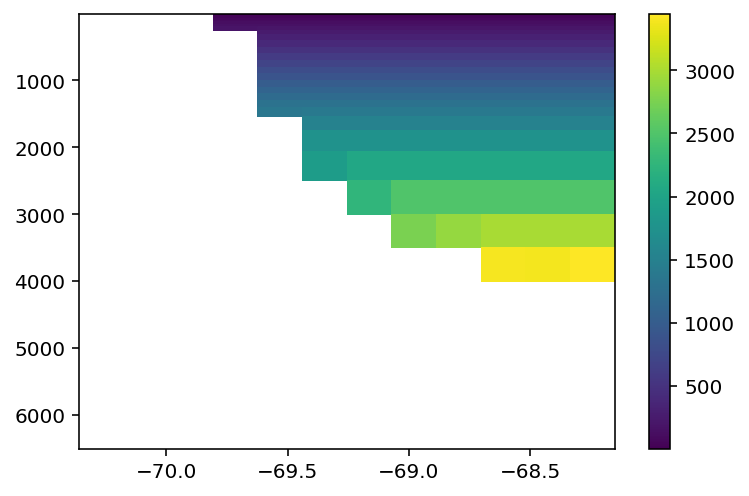

In [18]:
im = plt.pcolormesh(lat_20e,z_l,zl_20e_antwaterstress)
plt.gca().invert_yaxis()
plt.colorbar(im)

In [19]:
## Cannot have NaNs in the zl_20e_antwaterstress to use as coordinate in pcolormesh:
def forward_fill(arr):
    """ Forward fill a 2-D array along the column dimension"""
    # make a copy of the input array
    out = arr * 1.0
    # loop over column index
    for col_idx in range(0,arr.shape[1]):
        # get the column to work on
        _row = arr[:,col_idx]
        # get index numbers of nan values
        _nan_vals = np.argwhere(np.isnan(_row))
        # find the last "good" value
        _depth = 0. if _nan_vals[0] == 0 else _row[_nan_vals[0]-1]
        # set nan values to the last good value
        _row = np.where(np.isnan(_row),_depth,_row)
        # re-assign the filled column
        out[:,col_idx] = _row
    return out

In [20]:
zl_20e = forward_fill(zl_20e_antwaterstress_nm)
zl_150e = forward_fill(zl_150e_antwaterstress_nm)
zl_130w = forward_fill(zl_130w_antwaterstress_nm)
zl_80w = forward_fill(zl_80w_antwaterstress_nm)

In [21]:
# Broadcast lat to zl_20e (etc)
lat_20e_b = np.broadcast_to(lat_20e,zl_20e.shape)
lat_150e_b = np.broadcast_to(lat_150e,zl_150e.shape)
lat_130w_b = np.broadcast_to(lat_130w,zl_130w.shape)
lat_80w_b = np.broadcast_to(lat_80w,zl_80w.shape)

lat_20e_b.shape

(35, 13)

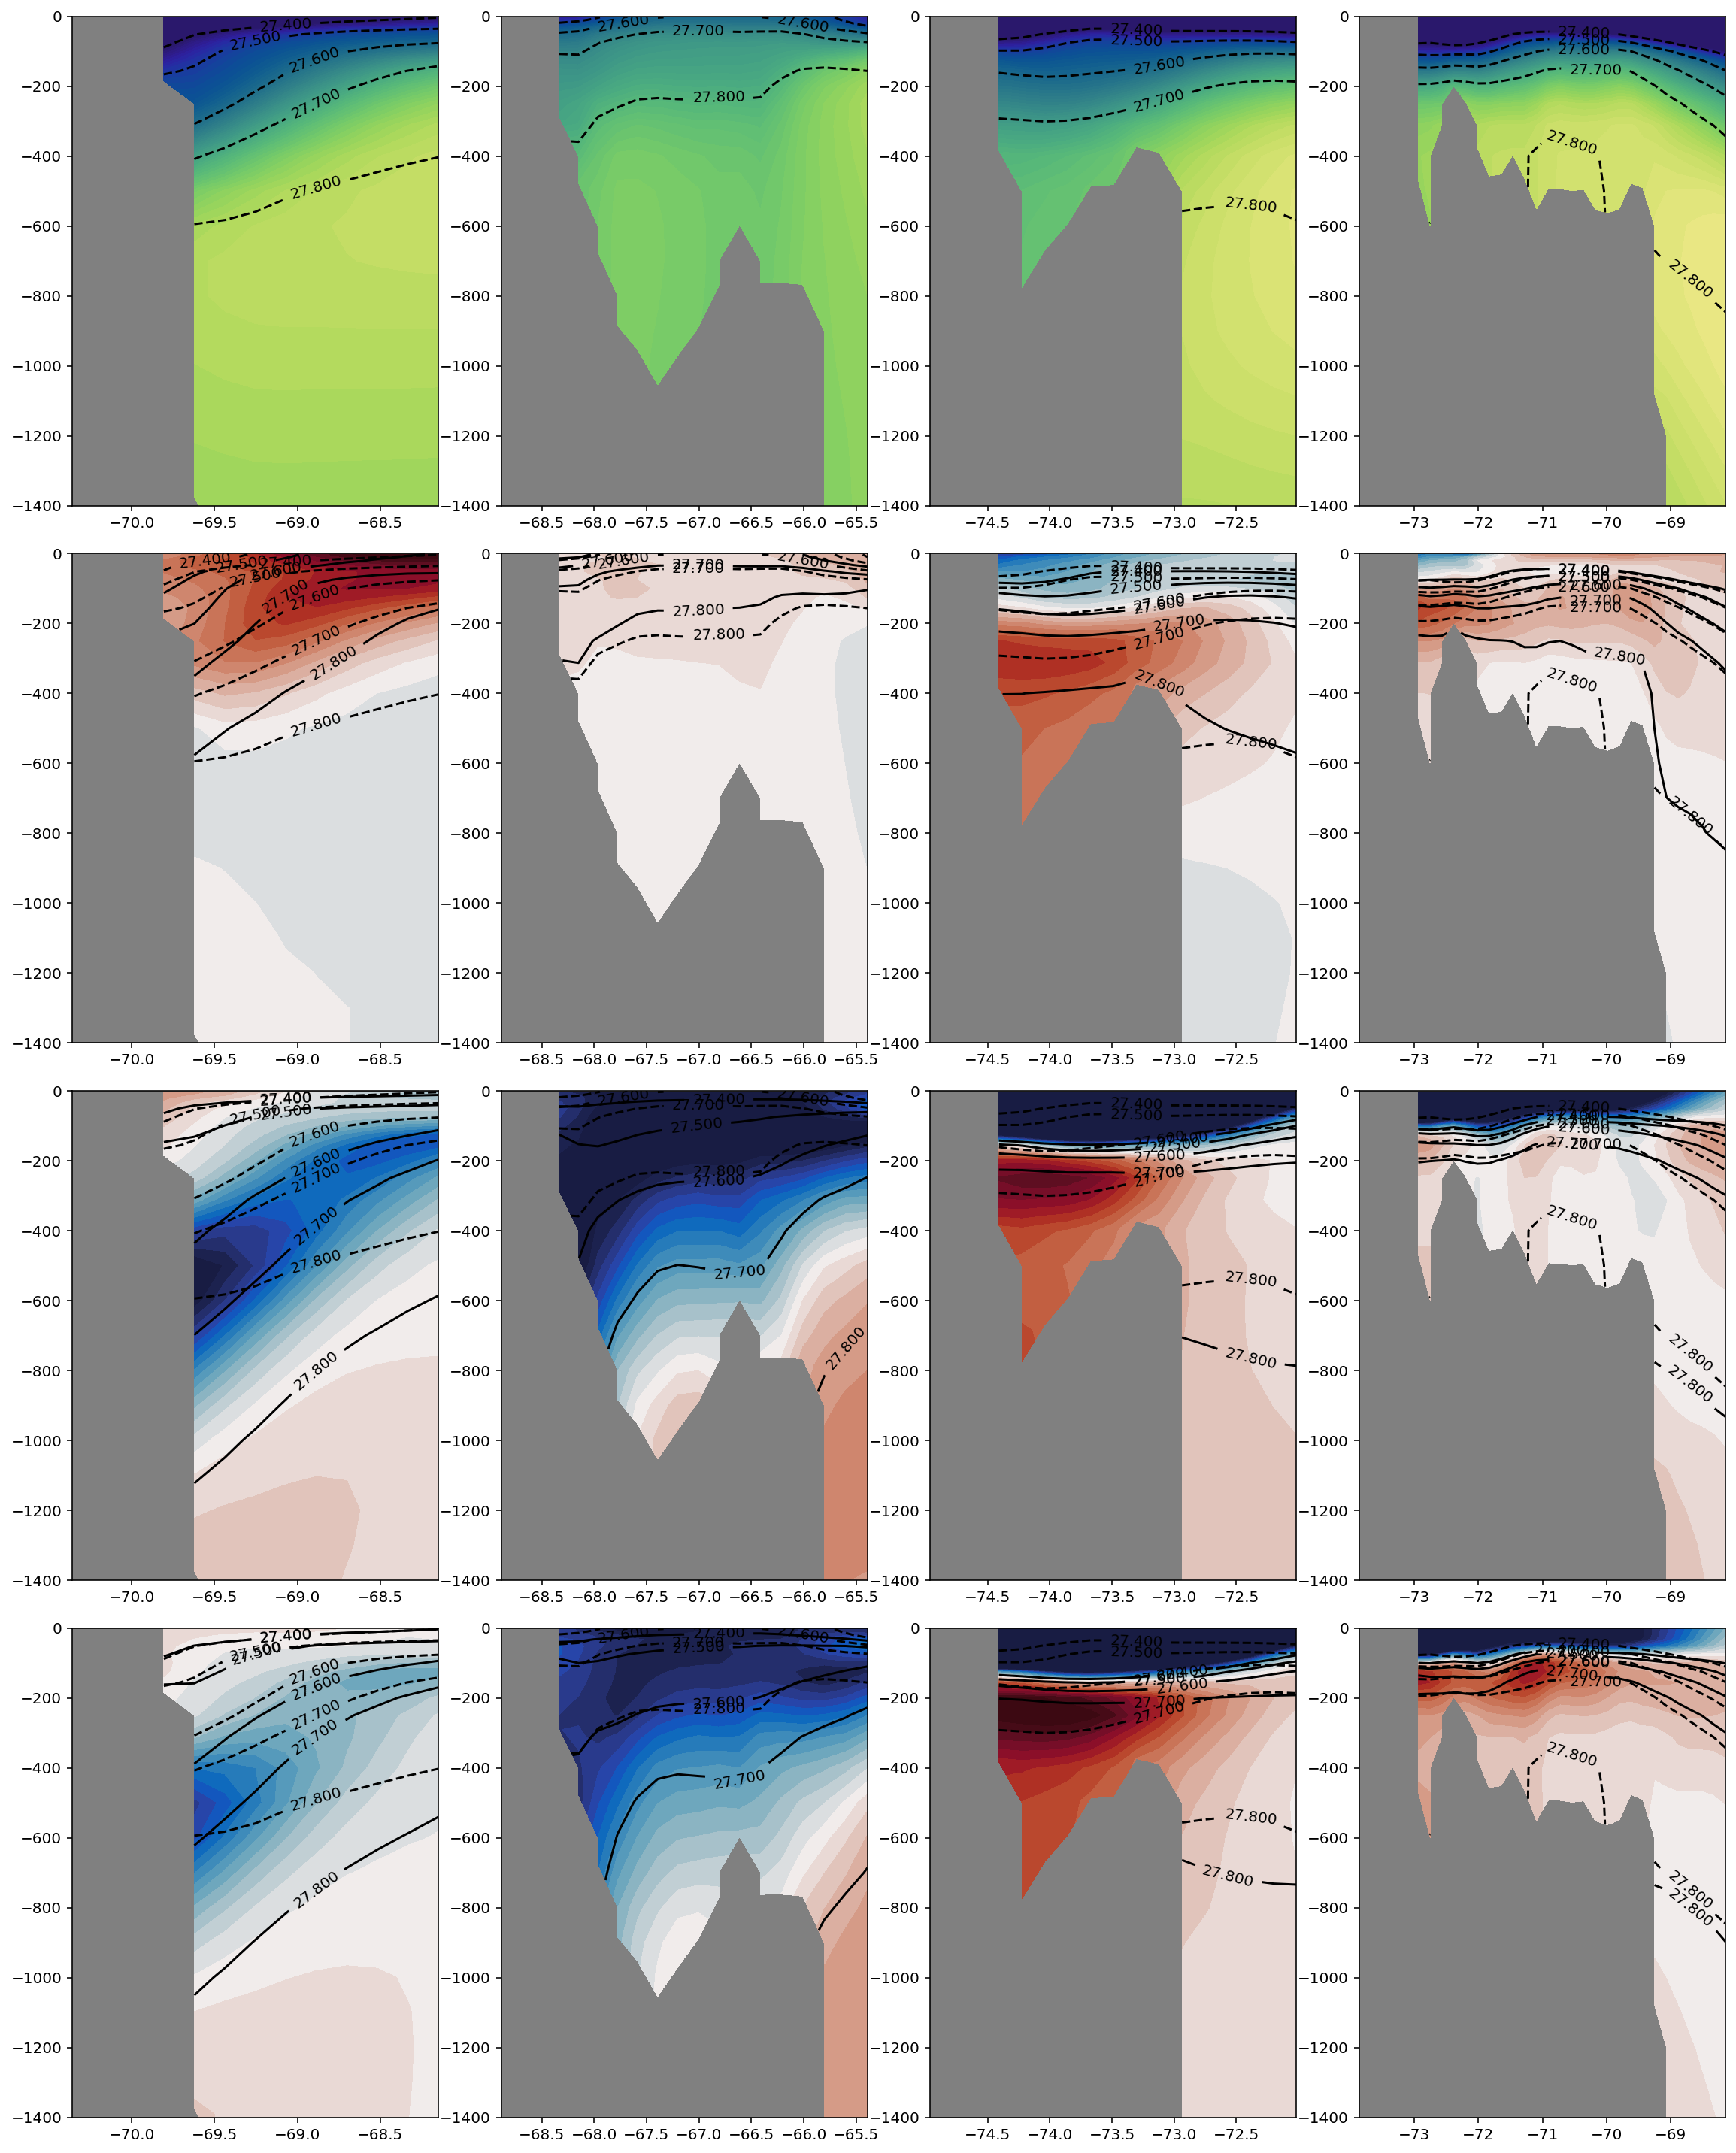

In [22]:
### Plot piControl so and anomalies at each cross-section:

potorho_control = ds_potorho_esm4_piControl.poto_rho_ref_surface_esm4 - 1000

#axes = (ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(ncols=4,nrows=4,figsize=(16,20),subplot_kw=dict(facecolor='grey'))
#f, (axes) = plt.subplots(ncols=4,nrows=4,figsize=(16,20),subplot_kw=dict(facecolor='grey'))
plt.tight_layout()

custom_ylim = (-1400,0)

#for ax in axes:
#    plt.setp(ax,ylim=custom_ylim)
plt.setp(ax1, ylim=custom_ylim)
plt.setp(ax2, ylim=custom_ylim)
plt.setp(ax3, ylim=custom_ylim)
plt.setp(ax4, ylim=custom_ylim)
plt.setp(ax5, ylim=custom_ylim)
plt.setp(ax6, ylim=custom_ylim)
plt.setp(ax7, ylim=custom_ylim)
plt.setp(ax8, ylim=custom_ylim)
plt.setp(ax9, ylim=custom_ylim)
plt.setp(ax10, ylim=custom_ylim)
plt.setp(ax11, ylim=custom_ylim)
plt.setp(ax12, ylim=custom_ylim)
plt.setp(ax13, ylim=custom_ylim)
plt.setp(ax14, ylim=custom_ylim)
plt.setp(ax15, ylim=custom_ylim)
plt.setp(ax16, ylim=custom_ylim)

levels_so = np.linspace(34.0,34.80,70)
levels_so_30 = np.linspace(-0.3,0.3,30)

################## Row 1 esm4 piControl 100-yr average #############

ax1.contourf(lat_20e_b,-zl_20e,asc_region_piControl_esm4_20e_so.values,cmap=cmocean.cm.haline,vmin=34.0,vmax=34.80,levels=levels_so,extend='both')
a = ax1.contour(lat_20e_b,-zl_20e,potorho_control.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax1.clabel(a,inline=True)

ax2.contourf(lat_150e_b,-zl_150e,asc_region_piControl_esm4_150e_so.values,cmap=cmocean.cm.haline,vmin=34.0,vmax=34.80,levels=levels_so,extend='both')
b = ax2.contour(lat_150e_b,-zl_150e,potorho_control.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax2.clabel(b,inline=True)

ax3.contourf(lat_130w_b,-zl_130w,asc_region_piControl_esm4_130w_so.values,cmap=cmocean.cm.haline,vmin=34.0,vmax=34.80,levels=levels_so,extend='both')
c = ax3.contour(lat_130w_b,-zl_130w,potorho_control.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax3.clabel(c,inline=True)

ax4.contourf(lat_80w_b,-zl_80w,asc_region_piControl_esm4_80w_so.values,cmap=cmocean.cm.haline,vmin=34.0,vmax=34.80,levels=levels_so,extend='both')
d = ax4.contour(lat_80w_b,-zl_80w,potorho_control.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax4.clabel(d,inline=True)

################## Row 2 esm4 stress 20 yr average anomalies #############
ax5.contourf(lat_20e_b,-zl_20e,asc_region_stress_esm4_20e_so_ens_mean_diff.values,cmap=cmocean.cm.balance,vmin=-0.3,vmax=0.3,levels=levels_so_30,extend='both')
e = ax5.contour(lat_20e_b,-zl_20e,potorho_control.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
f = ax5.contour(lat_20e_b,-zl_20e,asc_region_stress_esm4_20e_so_potodens_ens_mean.values,colors='black',\
            linestyles='-',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax5.clabel(e,inline=True)
ax5.clabel(f,inline=True)


ax6.contourf(lat_150e_b,-zl_150e,asc_region_stress_esm4_150e_so_ens_mean_diff.values,cmap=cmocean.cm.balance,vmin=-0.3,vmax=0.3,levels=levels_so_30,extend='both')
g = ax6.contour(lat_150e_b,-zl_150e,potorho_control.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
h = ax6.contour(lat_150e_b,-zl_150e,asc_region_stress_esm4_150e_so_potodens_ens_mean.values,colors='black',\
            linestyles='-',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax6.clabel(g,inline=True)
ax6.clabel(h,inline=True)



ax7.contourf(lat_130w_b,-zl_130w,asc_region_stress_esm4_130w_so_ens_mean_diff.values,cmap=cmocean.cm.balance,vmin=-0.3,vmax=0.3,levels=levels_so_30,extend='both')
i = ax7.contour(lat_130w_b,-zl_130w,potorho_control.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
j = ax7.contour(lat_130w_b,-zl_130w,asc_region_stress_esm4_130w_so_potodens_ens_mean.values,colors='black',\
            linestyles='-',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax7.clabel(i,inline=True)
ax7.clabel(j,inline=True)


ax8.contourf(lat_80w_b,-zl_80w,asc_region_stress_esm4_80w_so_ens_mean_diff.values,cmap=cmocean.cm.balance,vmin=-0.3,vmax=0.3,levels=levels_so_30,extend='both')
k = ax8.contour(lat_80w_b,-zl_80w,potorho_control.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
l = ax8.contour(lat_80w_b,-zl_80w,asc_region_stress_esm4_80w_so_potodens_ens_mean.values,colors='black',\
            linestyles='-',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax8.clabel(k,inline=True)
ax8.clabel(l,inline=True)


################## Row 3 esm4 antwater 20 yr average anomalies #############
ax9.contourf(lat_20e_b,-zl_20e,asc_region_antwater_esm4_20e_so_ens_mean_diff.values,cmap=cmocean.cm.balance,vmin=-0.3,vmax=0.3,levels=levels_so_30,extend='both')
m = ax9.contour(lat_20e_b,-zl_20e,potorho_control.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
n = ax9.contour(lat_20e_b,-zl_20e,asc_region_antwater_esm4_20e_so_potodens_ens_mean.values,colors='black',\
            linestyles='-',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax9.clabel(m,inline=True)
ax9.clabel(n,inline=True)


ax10.contourf(lat_150e_b,-zl_150e,asc_region_antwater_esm4_150e_so_ens_mean_diff.values,cmap=cmocean.cm.balance,vmin=-0.3,vmax=0.3,levels=levels_so_30,extend='both')
o = ax10.contour(lat_150e_b,-zl_150e,potorho_control.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
p = ax10.contour(lat_150e_b,-zl_150e,asc_region_antwater_esm4_150e_so_potodens_ens_mean.values,colors='black',\
            linestyles='-',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax10.clabel(o,inline=True)
ax10.clabel(p,inline=True)

ax11.contourf(lat_130w_b,-zl_130w,asc_region_antwater_esm4_130w_so_ens_mean_diff.values,cmap=cmocean.cm.balance,vmin=-0.3,vmax=0.3,levels=levels_so_30,extend='both')
ab = ax11.contour(lat_130w_b,-zl_130w,potorho_control.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ac = ax11.contour(lat_130w_b,-zl_130w,asc_region_antwater_esm4_130w_so_potodens_ens_mean.values,colors='black',\
            linestyles='-',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax11.clabel(ab,inline=True)
ax11.clabel(ac,inline=True)

ax12.contourf(lat_80w_b,-zl_80w,asc_region_antwater_esm4_80w_so_ens_mean_diff.values,cmap=cmocean.cm.balance,vmin=-0.3,vmax=0.3,levels=levels_so_30,extend='both')
q = ax12.contour(lat_80w_b,-zl_80w,potorho_control.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
r = ax12.contour(lat_80w_b,-zl_80w,asc_region_antwater_esm4_80w_so_potodens_ens_mean.values,colors='black',\
            linestyles='-',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax12.clabel(q,inline=True)
ax12.clabel(r,inline=True)

################## Row 4 esm4 antwaterstress 20 yr average anomalies #############

ax13.contourf(lat_20e_b,-zl_20e,asc_region_antwaterstress_esm4_20e_so_ens_mean_diff.values,cmap=cmocean.cm.balance,vmin=-0.3,vmax=0.3,levels=levels_so_30,extend='both')
s = ax13.contour(lat_20e_b,-zl_20e,potorho_control.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
t = ax13.contour(lat_20e_b,-zl_20e,asc_region_antwaterstress_esm4_20e_so_potodens_ens_mean.values,colors='black',\
            linestyles='-',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax13.clabel(s,inline=True)
ax13.clabel(t,inline=True)

ax14.contourf(lat_150e_b,-zl_150e,asc_region_antwaterstress_esm4_150e_so_ens_mean_diff.values,cmap=cmocean.cm.balance,vmin=-0.3,vmax=0.3,levels=levels_so_30,extend='both')
u = ax14.contour(lat_150e_b,-zl_150e,potorho_control.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
v = ax14.contour(lat_150e_b,-zl_150e,asc_region_antwaterstress_esm4_150e_so_potodens_ens_mean.values,colors='black',\
            linestyles='-',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax14.clabel(u,inline=True)
ax14.clabel(v,inline=True)

ax15.contourf(lat_130w_b,-zl_130w,asc_region_antwaterstress_esm4_130w_so_ens_mean_diff.values,cmap=cmocean.cm.balance,vmin=-0.3,vmax=0.3,levels=levels_so_30,extend='both')
w = ax15.contour(lat_130w_b,-zl_130w,potorho_control.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
x = ax15.contour(lat_130w_b,-zl_130w,asc_region_antwaterstress_esm4_130w_so_potodens_ens_mean.values,colors='black',\
            linestyles='-',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax15.clabel(w,inline=True)
ax15.clabel(x,inline=True)

ax16.contourf(lat_80w_b,-zl_80w,asc_region_antwaterstress_esm4_80w_so_ens_mean_diff.values,cmap=cmocean.cm.balance,vmin=-0.3,vmax=0.3,levels=levels_so_30,extend='both')
y = ax16.contour(lat_80w_b,-zl_80w,potorho_control.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,colors='black',\
            linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
z = ax16.contour(lat_80w_b,-zl_80w,asc_region_antwaterstress_esm4_80w_so_potodens_ens_mean.values,colors='black',\
            linestyles='-',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90])
ax16.clabel(y,inline=True)
ax16.clabel(z,inline=True)

plt.savefig('esm4_Shelf_salinity_mmm_anomalies_true_bathymetry.pdf',format='pdf',facecolor='white')